In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('RecommenderSystemsSurvey.csv')
df.head()

,Timestamp,What age bracket are you in?,What websites/applications do you think provide recommendations for you?,Are you aware that the items you see on these applications are personalised to satisfy your tastes?,How often do you get recommendations that you think are irrelevant?,How often do you find yourself getting frustrated when you can't find anything you like on these applications?,Would you be willing to tell these applications which items you have consumed in the past to receive better recommendations?
0,2020/05/10 7:37:50 PM GMT+1,40 - 49,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Sometimes,"Yes, providing I know that my data is safe"
1,2020/05/12 1:26:05 PM GMT+1,40 - 49,Music Streaming Apps;Social Media Platforms,Yes,Often,Sometimes,"Yes, providing I know that my data is safe"
2,2020/05/12 1:31:31 PM GMT+1,40 - 49,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Often,No
3,2020/05/12 1:50:16 PM GMT+1,30 - 39,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Never,"Yes, providing I know that my data is safe"
4,2020/05/12 2:00:21 PM GMT+1,30 - 39,Social Media Platforms,No,Often,Often,No


In [3]:
df = df.rename(columns = {"What age bracket are you in?": 'AgeBracket',
                        'What websites/applications do you think provide recommendations for you?': 'Applications',
                        'Are you aware that the items you see on these applications are personalised to satisfy your tastes?': 'AwareOfRecommendations',
                        'How often do you get recommendations that you think are irrelevant?': 'IrrelevantRecommendations',
                        'How often do you find yourself getting frustrated when you can\'t find anything you like on these applications?': 'FrustratedByRecommendations',
                        "Would you be willing to tell these applications which items you have consumed in the past to receive better recommendations? ": 'ProvideData'})
df = df.drop(['Timestamp'], axis=1)
df.head()

,AgeBracket,Applications,AwareOfRecommendations,IrrelevantRecommendations,FrustratedByRecommendations,ProvideData
0,40 - 49,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Sometimes,"Yes, providing I know that my data is safe"
1,40 - 49,Music Streaming Apps;Social Media Platforms,Yes,Often,Sometimes,"Yes, providing I know that my data is safe"
2,40 - 49,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Often,No
3,30 - 39,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Never,"Yes, providing I know that my data is safe"
4,30 - 39,Social Media Platforms,No,Often,Often,No


In [4]:
df['ApplicationsList'] = [i.split(';') for i in df.Applications]
df['ApplicationsList'].head(5)

0    [Movie/TV Streaming Apps, Music Streaming Apps...
1       [Music Streaming Apps, Social Media Platforms]
2    [Movie/TV Streaming Apps, Music Streaming Apps...
3    [Movie/TV Streaming Apps, Music Streaming Apps...
4                             [Social Media Platforms]
Name: ApplicationsList, dtype: object

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Enocde the objective genres with values of 1 and 0
application_df = pd.DataFrame(mlb.fit_transform(df.ApplicationsList),
                          columns=mlb.classes_,
                          index=df.index)

df = pd.concat([application_df,df], axis=1)

df.head()

,"google home, Alexa etc.",Don't know,E-Commerce Websites,Movie/TV Streaming Apps,Music Streaming Apps,News Websites,Social Media Platforms,web search engines,AgeBracket,Applications,AwareOfRecommendations,IrrelevantRecommendations,FrustratedByRecommendations,ProvideData,ApplicationsList
0,1,0,1,1,1,1,1,1,40 - 49,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Sometimes,"Yes, providing I know that my data is safe","[Movie/TV Streaming Apps, Music Streaming Apps..."
1,0,0,0,0,1,0,1,0,40 - 49,Music Streaming Apps;Social Media Platforms,Yes,Often,Sometimes,"Yes, providing I know that my data is safe","[Music Streaming Apps, Social Media Platforms]"
2,0,0,1,1,1,1,1,0,40 - 49,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Often,No,"[Movie/TV Streaming Apps, Music Streaming Apps..."
3,0,0,1,1,1,1,1,0,30 - 39,Movie/TV Streaming Apps;Music Streaming Apps;E...,Yes,Sometimes,Never,"Yes, providing I know that my data is safe","[Movie/TV Streaming Apps, Music Streaming Apps..."
4,0,0,0,0,0,0,1,0,30 - 39,Social Media Platforms,No,Often,Often,No,[Social Media Platforms]


In [6]:
df.columns

Index([' google home, Alexa etc. ', 'Don't know', 'E-Commerce Websites',
       'Movie/TV Streaming Apps', 'Music Streaming Apps', 'News Websites',
       'Social Media Platforms', 'web search engines', 'AgeBracket',
       'Applications', 'AwareOfRecommendations', 'IrrelevantRecommendations',
       'FrustratedByRecommendations', 'ProvideData', 'ApplicationsList'],
      dtype='object')

In [7]:

df["E-Commerce Websites"].value_counts()

0    78
1    58
Name: E-Commerce Websites, dtype: int64

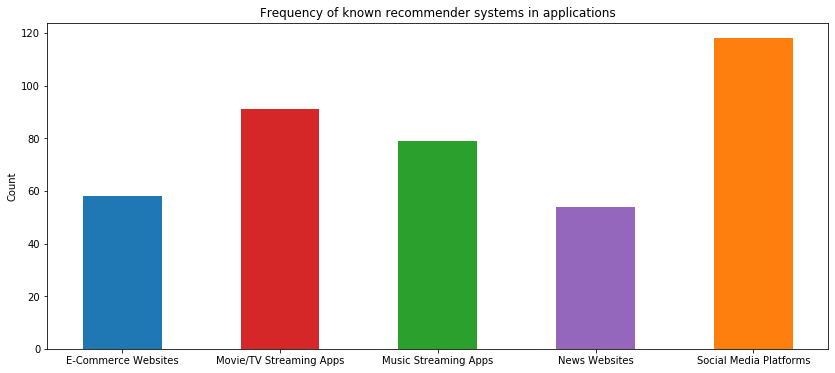

In [10]:
apps = ['E-Commerce Websites', 'Movie/TV Streaming Apps', 'Music Streaming Apps', 'News Websites', 'Social Media Platforms', ]

to_remove = [' google home, Alexa etc. ', "Don't know", 'web search engines']

app = [i for i in apps if i not in to_remove]

yes_list = []

for app in apps:
    
    n_yes = len(df.loc[df[app]==1])
    yes_list.append(n_yes)
#     print(app, n_yes)
    
    
plt.figure(figsize=(14,6))
plt.bar(apps, yes_list, align='center', width=0.5, color=['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange'])
plt.title("Frequency of known recommender systems in applications")
plt.ylabel("Count")
plt.show()